In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

print("images shape: %s" % str(digits.images.shape))
print("target shape: %s" % str(digits.target.shape))

images shape: (1797, 8, 8)
target shape: (1797,)


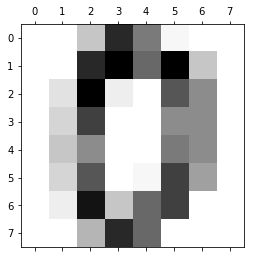

In [13]:
%matplotlib inline
plt.matshow(digits.images[0], cmap=plt.cm.Greys)

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
X = digits.data.reshape(-1, 64)
print(X.shape)

(1797, 64)


In [17]:
y = digits.target
print(y.shape)

(1797,)


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

X_pca = pca.transform(X)
X_pca.shape


(1797, 2)

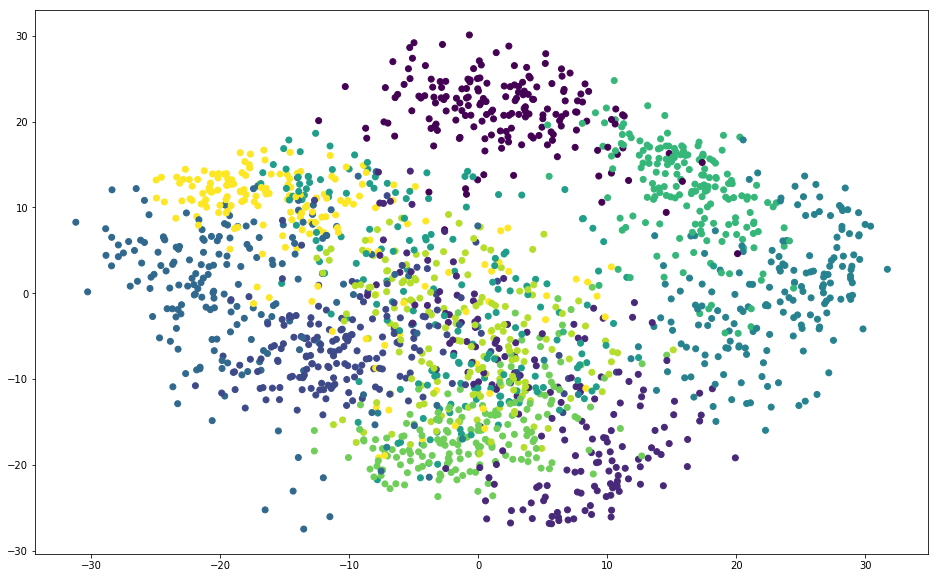

In [28]:
plt.figure(figsize=(16,10))

plt.scatter(X_pca[:, 0], X_pca[:,1], c=y)


In [31]:
print(pca.mean_.shape)
print(pca.components_.shape)


(64,)
(2, 64)


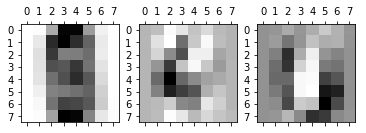

In [34]:
fix, ax = plt.subplots(1,3)
ax[0].matshow(pca.mean_.reshape(8,8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0,:].reshape(8,8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1,:].reshape(8,8), cmap=plt.cm.Greys)

In [35]:
from sklearn.manifold import Isomap

In [38]:
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(X)

X_isomap = isomap.transform(X)
X_isomap.shape

(1797, 2)

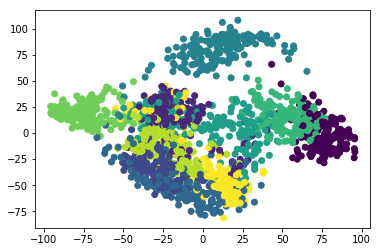

In [39]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [45]:
print("X_train shape %s" % repr(X_train.shape))
print("X_test shape %s" % repr(X_test.shape))
print("y_train shape %s" % repr(y_train.shape))
print("y_test shape %s" % repr(y_test.shape))

X_train shape (1347, 64)
X_test shape (450, 64)
y_train shape (1347,)
y_test shape (450,)


In [52]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
svm.predict(X_train)
svm.score(X_train, y_train)
svm.score(X_test, y_test)


c:\users\chhen\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9311111111111111

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
rf.score(X_test, y_test)

c:\users\chhen\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9533333333333334

In [62]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf, X_train, y_train, cv=5)
print("scores: %s mean: %f std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [0.94160584 0.90774908 0.93726937 0.92134831 0.95075758] mean: 0.931746 std: 0.015317


In [63]:
rf2 = RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rf2, X_train, y_train, cv=5)
print("scores: %s mean: %f std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [0.96715328 0.9704797  0.96678967 0.9588015  0.96969697] mean: 0.966584 std: 0.004142
